In [2]:
import tensorflow.keras as keras
keras.__version__

"""
Allocate only as much GPU memory as needed for the runtime allocations.
"""
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test  = sequence.pad_sequences(x_test,  maxlen=max_len)

model = keras.models.Sequential()

model.add(layers.Embedding(max_features, 128,
                            input_length=max_len,
                            name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
__________________________________________________

In [4]:
callbacks = [
    keras.callbacks.TensorBoard(
        # Log files will be written at this location.
        log_dir='my_log_dir',

        # Records activation histograms every 1 epoch.
        histogram_freq=1,

        # Recrods embedding data every 1 epoch.
        embeddings_freq=1,
    )
]

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/20
  1/157 [..............................] - ETA: 0s - loss: 7.2531 - acc: 0.4922WARNING:tensorflow:From /home/ansel/.local/lib/python3.6/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
157/157 [==============================] - 4s 23ms/step - loss: 0.6694 - acc: 0.6376 - val_loss: 0.6390 - val_acc: 0.7420
Epoch 2/20
157/157 [==============================] - 3s 21ms/step - loss: 0.4426 - acc: 0.8437 - val_loss: 0.4157 - val_acc: 0.8640
Epoch 3/20
157/157 [==============================] - 3s 21ms/step - loss: 0.3834 - acc: 0.8765 - val_loss: 0.4466 - val_acc: 0.8664
Epoch 4/20
157/157 [==============================] - 3s 21ms/step - loss: 0.3724 - acc: 0.8918 - val_loss: 0.5509 - val_acc: 0.8584
Epoch 5/20
157/157 [==============================] - 3s 21ms/step - loss: 0.3272 - acc: 0.9069 - val_l

### At this point, you can launch the TensorBoard server from the command line, instructing it to read the logs the callback is currently writting.

### $ tensorboard --logdir=my_log_dir

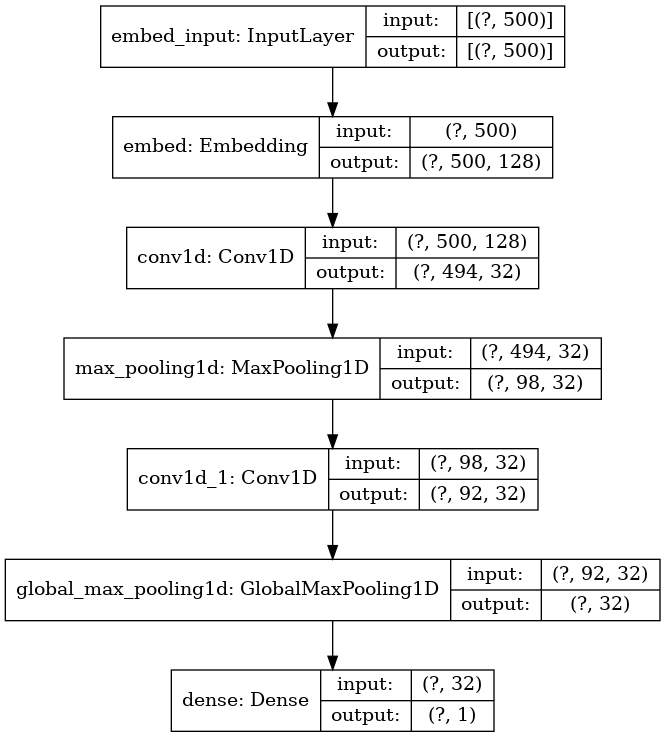

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)
# plot_model(model, show_shapes=True, to_file='model.png')